In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with = engine)

In [9]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).first()

('2017-08-23',)

In [13]:
# Calculate the date one year from the last date in data set.
# Starting from the most recent data point in the database.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()
precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Perform a query to retrieve the data and precipitation scores
df = pd.DataFrame(precip)
df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = df.set_index('date')
df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [17]:
# Sort the dataframe by date
df = df.sort_index()


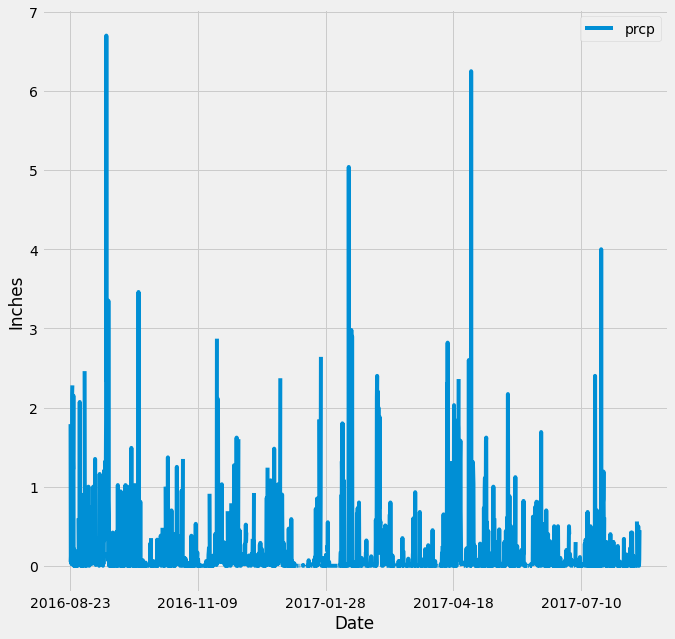

In [19]:
prcp_date = df.plot(figsize= (10,10))

prcp_date.set_xlabel("Date")
prcp_date.set_ylabel("Inches")


# Use Pandas Plotting with Matplotlib to plot the data
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rslt_series = pd.Series(prcp_date)

rslt_series.describe()

count                                    1
unique                                   1
top       AxesSubplot(0.08,0.07;0.87x0.81)
freq                                     1
dtype: object

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset

stations = session.query(func.count(station.station)).all()
stations

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()

# List the stations and the counts in descending order.
active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
active_stations[0][0]

most_active = active_stations[0][0]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == most_active).all()

temp_data

[(54.0, 85.0, 71.66378066378067)]

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_station_id = session.query(measurement.date, measurement.tobs).filter(measurement.date >= query_date).all()
max_station_id

temp_obs = pd.DataFrame(max_station_id)

temp_obs

,date,tobs
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0
...,...,...
2225,2017-08-19,71.0
2226,2017-08-20,78.0
2227,2017-08-21,76.0
2228,2017-08-22,76.0


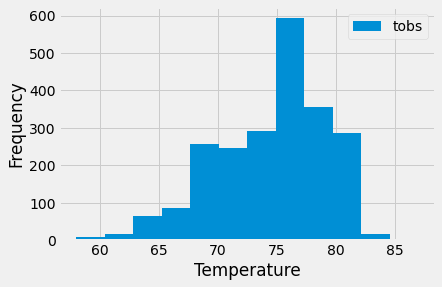

In [44]:
histo = plt.hist(temp_obs["tobs"], bins = 12)
legend = ['tobs']
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(legend)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()